# Exercício 4

A janela está sendo construída de forma que a mesma é constituída de um retângulo com um semicírculo no topo. Se houver 12 m de materiais de enquadramento, qual devem ser as dimensões da janela para se permitir a maior entrada de luz externa?

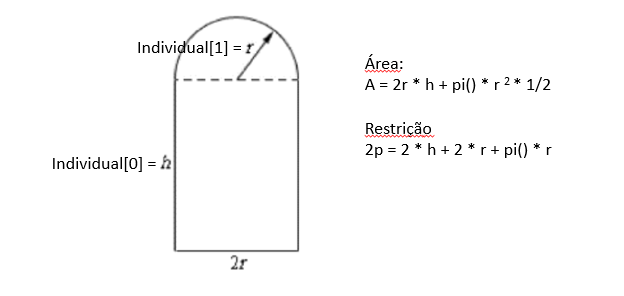

## Instalar pacote DEAP

In [1]:
!pip install deap

# Importar bibliotecas necessárias

In [2]:
import matplotlib.pyplot as plt
from deap import base, creator, tools
import pandas as pd
import operator
import random
import numpy
import math

# Função objetivo

   - Função objetivo com objetivo de maximizar a area

In [3]:
def objective_function(individual):
    area = (individual[0]* 2 * individual[1]) + (math.pi * individual[1]**2 * .5) 
    return area,

# Restrição do problema


   - Verificar partícula - restrições impostas as partículas
       - Há uma restrição do tamanho quanto ao perîmetro:
          - 2p = 2 * h + 2 * r + pi() * r









In [4]:
def feasible(individual):
  if 2 * individual[0] + 2 * individual[1] + math.pi * individual[1] > 12:
    return False
  if (individual[0] < 0) or (individual[1] < 0):
    return False
  return True

## Criando a função de Minimização e a estrutura da partícula

In [5]:
#  função objetivo: nome, tipo(f.o.), o peso deve ser 1.0 para esse caso (função de maximização)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, smin=None, smax=None, best=None) # smin e smax são limites de speed. best é a melhor até o momento.

## Definindo uma função para gerar a partícula

In [6]:
# Função que cria uma partícula inicializando os atributos aleatoriamente.
# size é o número de variáveis de decisão, pmin e pmax são os limites das variáveis, smin e smax são os limites de velocidade
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

## Definindo a função para atualização da partícula 

In [7]:
# Esta função calcula a velocidade, os limites de veloicidade e a nova posição da partícula
# phi1 = fator cognitivo e phi2 = fator social
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part)) # indo em direção ao melhor conhecido pela partícula
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part)) # indo em direção ao melhor da vizinhaça
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

## Criando o toolbox

In [8]:
toolbox = base.Toolbox()

# Função para gerar a partícula com valores 
toolbox.register("particle", generate, size=2, pmin=0, pmax=12, smin=-3, smax=3)

# Adicionando a função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.particle)

# Adicionando a função para atualizar a população
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

# Adicionando as funções para avaliar a população
toolbox.register("evaluate", objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, -1000000))

## Definindo parêmetros para o PSO

   - **initial_population:** Número de inidivíduos da população inicial
   - **num_gen:** Número de iterações
   - **best:** Melhor partícula

In [9]:
initial_population = 100    
num_ite = 1000
best = None

### Criando a população inicial

In [10]:
# inicializando a população
pop = toolbox.population(n=initial_population)

### Estatísticas de avaliação (a cada geração)

   - Função objetivo
   - Média
   - Desvio padrão
   - Mínimo
   - Máximo

In [11]:
# estatísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

### Definindo um log para avaliar as partículas ao longo das iterações

In [12]:
logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

## Otimização

In [13]:
# Roda a otimização
for iteration in range(num_ite):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        # atualiza melhor da partícula
        if not part.best or part.best.fitness < part.fitness:
            part.best = creator.Particle(part)
            part.best.fitness.values = part.fitness.values
        # atualiza melhor global
        if not best or best.fitness < part.fitness:
            best = creator.Particle(part)
            best.fitness.values = part.fitness.values
    for part in pop:
        toolbox.update(part, best)

    # Salva todos os fitnesses em uma lista e imprime o status
    logbook.record(gen=iteration, evals=len(pop), **stats.compile(pop))
    print(logbook.stream)

gen	evals	avg    	std   	min   	max    
0  	100  	-960000	195960	-1e+06	9.16206
1  	100  	-960000	195960	-1e+06	8.74992
2  	100  	-779999	414248	-1e+06	10.0036
3  	100  	-859999	346988	-1e+06	9.14919
4  	100  	-829999	375634	-1e+06	9.25053
5  	100  	-849999	357073	-1e+06	9.39112
6  	100  	-809999	392303	-1e+06	8.62339
7  	100  	-879999	324963	-1e+06	9.50729
8  	100  	-819999	384189	-1e+06	7.97877
9  	100  	-829999	375635	-1e+06	9.2777 
10 	100  	-839999	366608	-1e+06	8.82383
11 	100  	-859999	346988	-1e+06	9.08655
12 	100  	-809999	392303	-1e+06	9.73768
13 	100  	-849999	357073	-1e+06	8.73294
14 	100  	-890000	312891	-1e+06	6.82083
15 	100  	-849999	357073	-1e+06	9.51005
16 	100  	-789999	407310	-1e+06	9.32377
17 	100  	-779999	414248	-1e+06	9.38024
18 	100  	-839999	366608	-1e+06	9.06147
19 	100  	-840000	366607	-1e+06	6.65068
20 	100  	-789999	407310	-1e+06	8.78996
21 	100  	-830000	375634	-1e+06	8.95122
22 	100  	-879999	324963	-1e+06	10.0593
23 	100  	-789999	407310	-1e+06	9.81417


## Melhor indivíduo

In [14]:
print('Raio  : ', best[1])
print('Altura: ', best[0])


Raio  :  1.726583317215882
Altura:  1.5595400462515432


## Avaliação do melhor indivíduo

In [17]:
print("Dimensões")
print('Raio   : ', best[1])
print('Altura : ', best[0])
print('Area   : ', objective_function(best)[0])

Dimensões
Raio   :  1.726583317215882
Altura :  1.5595400462515432
Area   :  10.068036798104679


In [18]:
print("Perímetro")
print(2 * best[0] + 2 * best[1] + math.pi * best[1])

Perímetro
11.99646819211096
